In [1]:
import math
import random

import gym
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical
import import_ipynb
import multiprocessing_env


importing Jupyter notebook from multiprocessing_env.ipynb


In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt


In [3]:

env_name = "CartPole-v0"
env = gym.make(env_name)

/home/iyer/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
class Actor(nn.Module):
    def __init__(self, input_dims,n_actions, h1, h2,lr):
        super(Actor,self).__init__()
        self.input_dims = input_dims
        self.lr = lr
        self.h1 = h1
        self.h2 = h2
        self.n_actions = n_actions
        self.linear1 = nn.Linear(*self.input_dims, self.h1)
        self.linear2 = nn.Linear(self.h1, self.h2)
        self.linear3 = nn.Linear(self.h2, self.n_actions)

    def forward(self,obs):
        x = torch.tensor(obs,dtype=torch.float)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)

        return x

In [5]:
class Critic(nn.Module):
    def __init__(self,input_dims,h1,h2,lr):
        super(Critic,self).__init__()
        self.lr=lr
        self.h1=h1
        self.h2=h2
        self.linear1=nn.Linear(input_dims,self.h1)
        self.linear2=nn.Linear(self.h1,self.h2)
        self.linear3=nn.Linear(self.h2,1)
        
    def forward(self,state):
        x=torch.FloatTensor(state)
        x=F.relu(self.linear1(x))
        x=F.relu(self.linear2(x))
        x=self.linear3(x)
        
        return x

In [6]:
def plot(rewards):
    score = np.array(rewards)
    iters = np.arange(len(rewards))
    plt.plot(iters,score)
    plt.xlabel('training iterations')
    plt.ylabel('Total rewards')
    plt.show()

    

In [7]:
def compute_returns(next_value, rewards, masks, gamma=0.99):
    R = next_value
    returns = []
    for step in reversed(range(len(rewards))):
        R = rewards[step] + gamma * R * masks[step]
        returns.insert(0, R)
    return returns

In [8]:
input_dims  = env.observation_space.shape[0]
n_actions = env.action_space.n

#Hyper params:
Actor = Actor([input_dims],n_actions,h1=64,h2=16,lr=0.001)
optimizerA = optim.Adam(Actor.parameters())
Critic=Critic(input_dims,h1=64,h2=16,lr=0.001)
optimizerC=optim.Adam(Critic.parameters())

In [9]:
num_episodes   = 1000
def test_env(vis=False):
    state = env.reset()
    if vis: env.render()
    done = False
    total_reward = 0
    while not done:
        state = torch.FloatTensor(state).unsqueeze(0)
        dist, _ = model(state)
        next_state, reward, done, _ = env.step(dist.sample().cpu().numpy()[0])
        state = next_state
        if vis: env.render()
        total_reward += reward
    return total_reward


episode:  0 reward 0.00
episode:  1 reward 15.00
episode:  2 reward 22.00
episode:  3 reward 15.00
episode:  4 reward 17.00
episode:  5 reward 13.00
episode:  6 reward 10.00
episode:  7 reward 12.00
episode:  8 reward 10.00
episode:  9 reward 18.00


/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


episode:  10 reward 26.00
episode:  11 reward 30.00
episode:  12 reward 14.00
episode:  13 reward 18.00
episode:  14 reward 20.00
episode:  15 reward 14.00
episode:  16 reward 17.00
episode:  17 reward 19.00
episode:  18 reward 15.00
episode:  19 reward 19.00
episode:  20 reward 13.00
episode:  21 reward 13.00
episode:  22 reward 10.00
episode:  23 reward 16.00
episode:  24 reward 17.00
episode:  25 reward 18.00
episode:  26 reward 34.00
episode:  27 reward 31.00
episode:  28 reward 13.00
episode:  29 reward 36.00
episode:  30 reward 15.00
episode:  31 reward 25.00
episode:  32 reward 23.00
episode:  33 reward 26.00
episode:  34 reward 14.00
episode:  35 reward 15.00
episode:  36 reward 32.00
episode:  37 reward 13.00
episode:  38 reward 47.00
episode:  39 reward 12.00
episode:  40 reward 19.00
episode:  41 reward 17.00
episode:  42 reward 29.00
episode:  43 reward 23.00
episode:  44 reward 22.00
episode:  45 reward 28.00
episode:  46 reward 14.00
episode:  47 reward 17.00
episode:  48

episode:  313 reward 156.00
episode:  314 reward 200.00
episode:  315 reward 190.00
episode:  316 reward 152.00
episode:  317 reward 124.00
episode:  318 reward 176.00
episode:  319 reward 153.00
episode:  320 reward 193.00
episode:  321 reward 165.00
episode:  322 reward 88.00
episode:  323 reward 124.00
episode:  324 reward 102.00
episode:  325 reward 88.00
episode:  326 reward 128.00
episode:  327 reward 117.00
episode:  328 reward 165.00
episode:  329 reward 158.00
episode:  330 reward 200.00
episode:  331 reward 200.00
episode:  332 reward 200.00
episode:  333 reward 121.00
episode:  334 reward 200.00
episode:  335 reward 200.00
episode:  336 reward 190.00
episode:  337 reward 200.00
episode:  338 reward 200.00
episode:  339 reward 200.00
episode:  340 reward 200.00
episode:  341 reward 200.00
episode:  342 reward 187.00
episode:  343 reward 200.00
episode:  344 reward 200.00
episode:  345 reward 142.00
episode:  346 reward 200.00
episode:  347 reward 200.00
episode:  348 reward 1

episode:  606 reward 200.00
episode:  607 reward 200.00
episode:  608 reward 200.00
episode:  609 reward 200.00
episode:  610 reward 200.00
episode:  611 reward 200.00
episode:  612 reward 164.00
episode:  613 reward 138.00
episode:  614 reward 167.00
episode:  615 reward 163.00
episode:  616 reward 136.00
episode:  617 reward 122.00
episode:  618 reward 166.00
episode:  619 reward 138.00
episode:  620 reward 200.00
episode:  621 reward 175.00
episode:  622 reward 200.00
episode:  623 reward 200.00
episode:  624 reward 143.00
episode:  625 reward 130.00
episode:  626 reward 200.00
episode:  627 reward 146.00
episode:  628 reward 159.00
episode:  629 reward 200.00
episode:  630 reward 114.00
episode:  631 reward 170.00
episode:  632 reward 162.00
episode:  633 reward 160.00
episode:  634 reward 166.00
episode:  635 reward 200.00
episode:  636 reward 200.00
episode:  637 reward 166.00
episode:  638 reward 160.00
episode:  639 reward 127.00
episode:  640 reward 161.00
episode:  641 reward

episode:  899 reward 200.00
episode:  900 reward 200.00
episode:  901 reward 200.00
episode:  902 reward 200.00
episode:  903 reward 200.00
episode:  904 reward 200.00
episode:  905 reward 200.00
episode:  906 reward 200.00
episode:  907 reward 200.00
episode:  908 reward 200.00
episode:  909 reward 200.00
episode:  910 reward 200.00
episode:  911 reward 200.00
episode:  912 reward 200.00
episode:  913 reward 200.00
episode:  914 reward 200.00
episode:  915 reward 200.00
episode:  916 reward 200.00
episode:  917 reward 200.00
episode:  918 reward 200.00
episode:  919 reward 200.00
episode:  920 reward 200.00
episode:  921 reward 200.00
episode:  922 reward 200.00
episode:  923 reward 200.00
episode:  924 reward 200.00
episode:  925 reward 200.00
episode:  926 reward 200.00
episode:  927 reward 200.00
episode:  928 reward 200.00
episode:  929 reward 200.00
episode:  930 reward 200.00
episode:  931 reward 200.00
episode:  932 reward 200.00
episode:  933 reward 200.00
episode:  934 reward

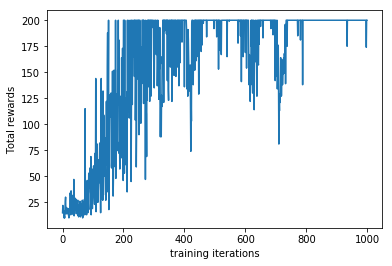

In [10]:
total_return=0
return_list = []
for  i in range(num_episodes):
    print('episode: ', i, 'reward %.2f' %total_return )
    total_return=0
    log_probs = []
    values    = []
    reward_list= []
    masks     = []
    entropy = 0
    done=False
    state = env.reset()
    while not done:
        state = torch.FloatTensor(state)
        value=Critic(state)
        X=Actor(state)
        probs=F.softmax(X)
        dist=Categorical(probs)
        action = dist.sample()
        next_state, reward, done, _ = env.step(action.item())
        log_probs.append(dist.log_prob(action))
        values.append(value)
        reward_list.append(reward)
        masks.append((1 - done))
        entropy+=dist.entropy().mean()
        state = next_state
        next_state = torch.FloatTensor(next_state)
        next_value = Critic(next_state)
        state = next_state
        total_return+=reward
    return_list.append(total_return)
    returns = compute_returns(next_value, reward_list, masks)
    advantage=[]
    for r,v in zip(returns,values):
        advantage.append(r-v)
    actor_loss=0
    critic_loss=0
    loss=0
    for g,log_prob in zip(advantage,log_probs):
        actor_loss+=-g*log_prob
        critic_loss+= g.pow(2)
    loss = actor_loss + 0.5 * critic_loss - 0.001 * entropy
    optimizerA.zero_grad()
    optimizerC.zero_grad()
    loss.backward()
    optimizerA.step()
    optimizerC.step()

plot(return_list) 

In [11]:
def test_env(vis=False):
    state = env.reset()
    if vis: env.render()
    done = False
    total_reward = 0
    while not done:
        state = torch.FloatTensor(state)
        X = Actor(state)
        probs=F.softmax(X)
        dist=Categorical(probs)
        next_state, reward, done, _ = env.step(dist.sample().item())
        state = next_state
        if vis: env.render()
        total_reward += reward
    return total_reward

In [12]:
test_env(True)

/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/home/iyer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


200.0